# A1 - Complex Networks
### Authors: Ignacio Miguel Rodríguez and Daniel Arias Cámara

## Part 1. Structural characterization of networks

You can find four different networks labelled as net1, net2, net3 and net4 in the activityA1.zip
file.  To characterize their macroscopic structure, the students should analyze (at least) the following network descriptors:

* Number of nodes
* Number of edges
* Minimum, maximum, and average degree
* Average clustering coefficient (average of the clustering coefficient of each node)
* Assortativity
* Average path length (average distance between all pairs of nodes)
* Diameter (maximum distance between nodes in the network)

Apart from these indicators, the degree distribution provides crucial information to understand the macroscopic structure of networks. For this reason, the students should obtain the degree distribution of each network and choose its most suitable representation (histogram in linear scale or in histogram in log-log scale with logarithmic binning).

The microscopic structure of the network is instead characterized by analyzing different centralities for the nodes of the network. The students should list the 5 most central nodes according to different metrics (betweenness, degree, eigenvector) and comment the results. Are these centrality indicators providing the same information on the relevance of the nodes for the network?

PS. Visualization of these networks using networkx is discouraged due to their large size.

### 1. Network 1: Watts-Strogatz network (WS)

In [49]:
from utils import NetworkAnalyzer

file_path = "networks/net1.net"
net1 = NetworkAnalyzer(file_path)
net1.extract_macroscopic_features()


Number of nodes: 5000
Number of edges: 25000
Minimum degree: 6
Maximum degree: 16
Average degree: 10.00
Average clustering coefficient: 0.4141
Assortativity (degree correlation): -0.0097
Average path length: 5.1211
Diameter: 8


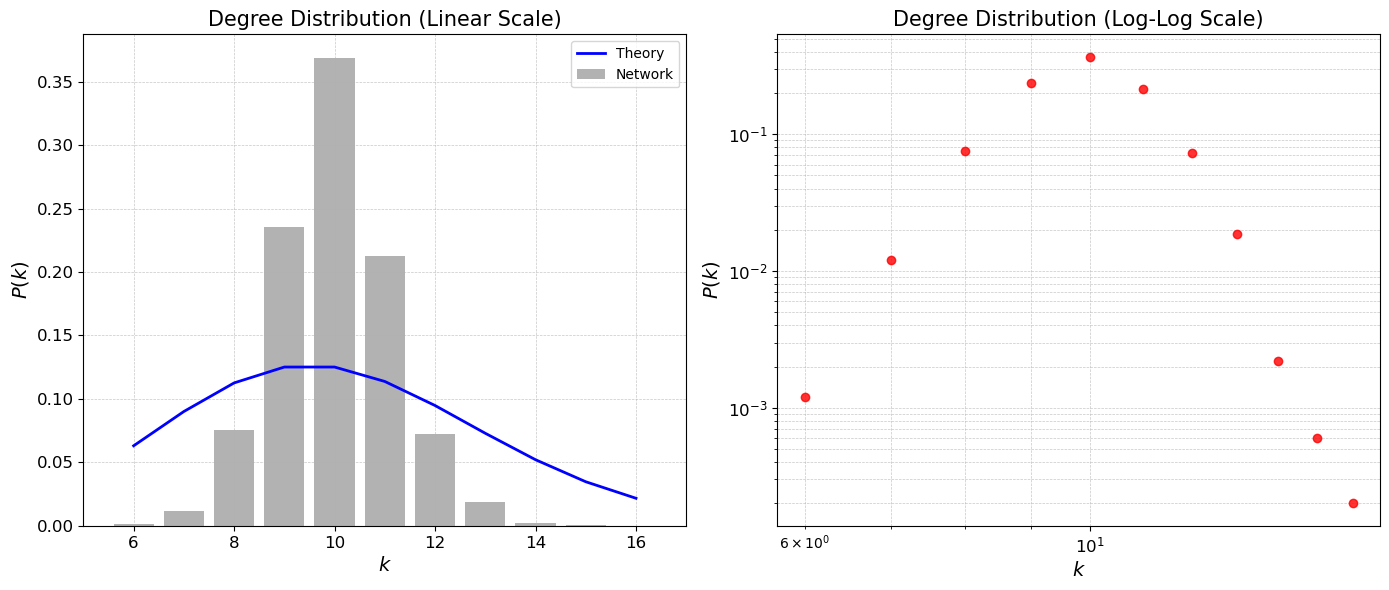

In [2]:
net1.plot_histograms(plot_theory=True)

/home/user/Escritorio/CN/A1_ComplexNetworks/utils.py:176: RuntimeWarning: divide by zero encountered in log
  log_ccdf_fit = np.log(ccdf)[:-1]


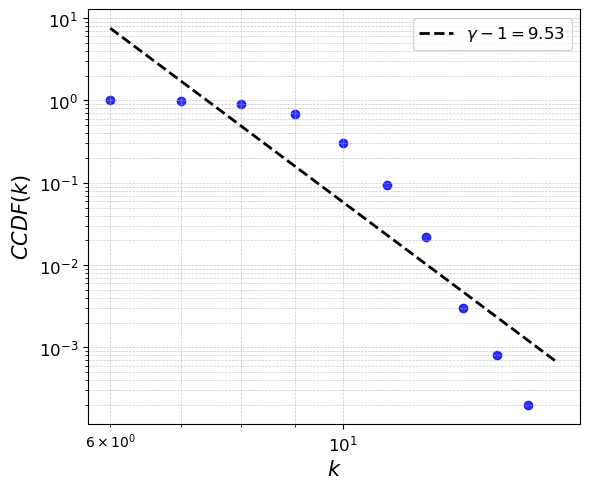

In [3]:
net1.fit_CCDF()

In [4]:
net1.extract_microscopic_features()


 Top 5 Nodes by Betweenness Centrality:
   4747: 0.0041
   2645: 0.0040
   230: 0.0038
   4360: 0.0038
   1579: 0.0037

 Top 5 Nodes by Degree Centrality:
   1693: 0.0032
   651: 0.0030
   1579: 0.0030
   4891: 0.0030
   41: 0.0028

 Top 5 Nodes by Eigenvector Centrality:
   651: 0.0286
   1937: 0.0265
   4526: 0.0256
   4398: 0.0253
   1939: 0.0252

 Top 5 Nodes by PageRank:
   1693: 0.0003
   1579: 0.0003
   4891: 0.0003
   651: 0.0003
   3659: 0.0003

 Nodes appearing in all four centrality rankings: None


#### Theoretical Background
The Watts-Strogatz model is characterized by:
- **High Clustering Coefficient**: Much higher than an equivalent Erdős-Rényi (ER) random graph.
- **Short Average Path Length**: Comparable to ER networks.
- **Degree Distribution**: Typically follows a peaked distribution rather than a scale-free power law.

Mathematically, for a WS model:
- The clustering coefficient for a regular ring lattice (initial step of WS) is given by:
  $$
  CC = \frac{3(k-2)}{4(k-1)}
  $$
  where $ k $ is the average degree.
- The average path length scales as:
  $$
  L \sim \frac{N}{2k}
  $$

#### Expected Clustering Coefficient
Substituting $ k = 10 $:
$$
CC_{WS} = \frac{3(10-2)}{4(10-1)} = \frac{24}{36} \approx 0.6667
$$
which is higher than the observed $ C = 0.4141 $, indicating some randomness in rewiring.

#### Expected Path Length
$$
L_{WS} \approx \frac{5000}{2(10)} = 250
$$
However, the observed $ L = 5.1211 $ is much smaller, suggesting rewiring has reduced distances significantly.

#### Degree Distribution Comparison
A WS model has a narrow degree distribution with most nodes having similar degrees. The given network's degree distribution (from the histogram) aligns with this property, peaking around the mean degree of 10.

#### **Conclusion**
The high clustering coefficient and small path length strongly indicate a small-world effect. Since the degree distribution is not scale-free but follows a peaked shape, the network likely fits the **Watts-Strogatz model** rather than a Barabási-Albert model or Erdős-Rényi random network.

### Network 2: Erdös-Rényi network (ER)

In [5]:
from utils import NetworkAnalyzer

file_path = "networks/net2.net"
net2 = NetworkAnalyzer(file_path)
net2.extract_macroscopic_features()

Number of nodes: 5000
Number of edges: 24873
Minimum degree: 1
Maximum degree: 24
Average degree: 9.95
Average clustering coefficient: 0.0021
Assortativity (degree correlation): -0.0057
Average path length: 3.9560
Diameter: 7


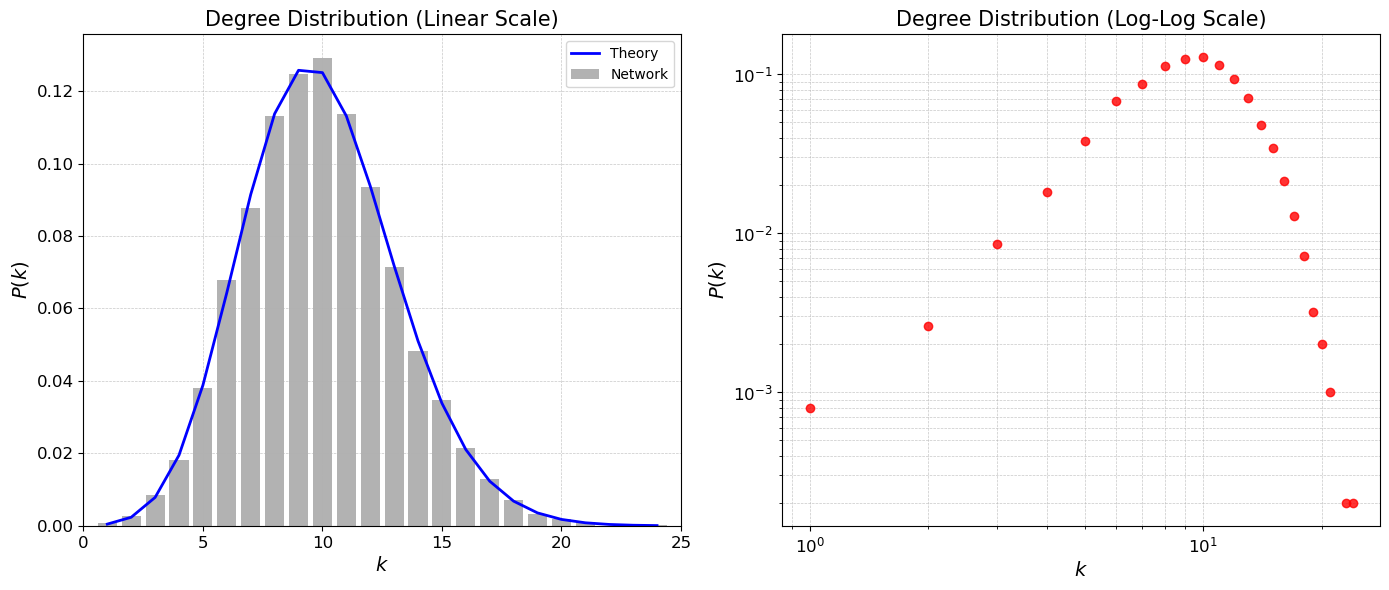

In [38]:
net2.plot_histograms(plot_theory=True)

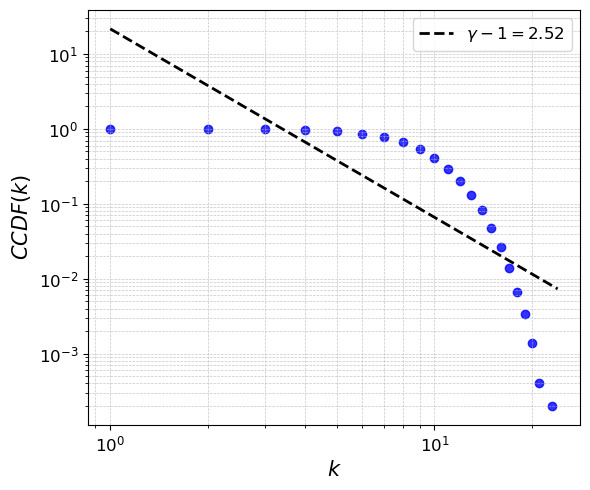

In [39]:
net2.fit_CCDF()

In [40]:
net2.extract_microscopic_features()


 Top 5 Nodes by Betweenness Centrality:
   1581: 0.0033
   787: 0.0026
   4382: 0.0025
   52: 0.0023
   2375: 0.0023

 Top 5 Nodes by Degree Centrality:
   1581: 0.0048
   787: 0.0046
   52: 0.0042
   1990: 0.0042
   2372: 0.0042

 Top 5 Nodes by Eigenvector Centrality:
   1581: 0.0412
   3233: 0.0343
   787: 0.0341
   2375: 0.0337
   131: 0.0335

 Top 5 Nodes by PageRank:
   1581: 0.0004
   787: 0.0004
   1990: 0.0004
   2372: 0.0004
   52: 0.0004

 Nodes appearing in all four centrality rankings: {'1581', '787'}


#### Expected Degree $\langle k \rangle$
From the ER model definition, the expected degree of a node is given by:

$$\langle k \rangle = p(N - 1)$$

We were given:  
- $ N = 5000 $ (number of nodes)  
- $ \langle k \rangle = 9.95 $ (observed average degree)

Thus, we can estimate $ p $:

$$p = \frac{\langle k \rangle}{N - 1} = \frac{9.95}{5000 - 1} \approx 0.002$$

This probability aligns well with typical Erdős–Rényi graphs where \( p \) is small, leading to a Poisson-like degree distribution.

#### Degree Distribution $ P(k) $
In the ER model, the degree distribution follows a **binomial distribution**:

$$
P(k) = \binom{N-1}{k} p^k (1 - p)^{N-1-k}
$$

For large $ N $, this approximates a **Poisson distribution**:

$$
P(k) \approx \frac{\langle k \rangle^k e^{-\langle k \rangle}}{k!}
$$

Substituting $ \langle k \rangle = 9.95 $:

$$
P(k) \approx \frac{9.95^k e^{-9.95}}{k!}
$$

This means the degree distribution should peak around $ k \approx 9.95 $ and decay rapidly for larger $ k $. The observed **minimum (1) and maximum (24) degrees** are reasonable within this distribution.

#### Clustering Coefficient $ CC $
The expected clustering coefficient for an ER graph is:

$$
CC = p
$$

From our estimate of $ p $:

$$
CC \approx 0.002
$$

The observed clustering coefficient $( CC = 0.0021 )$ is nearly identical to this prediction, confirming that the network follows ER properties.

#### Assortativity (Degree Correlation)
ER networks exhibit near-zero assortativity:

$$
r \approx 0
$$

The observed value:

$$
r = -0.0057
$$

This is very close to zero, meaning there is no strong preference for nodes to connect to others of similar degree—another characteristic of ER graphs.

#### Average Path Length & Diameter
For ER networks, the **expected average path length** is:

$$
\ell \approx \frac{\ln N}{\ln \langle k \rangle}
$$

Substituting values:

$$
\ell \approx \frac{\ln 5000}{\ln 9.95} = \frac{8.52}{2.30} \approx 3.7
$$

The observed value $( \ell = 3.956 )$ is very close to this prediction.

Similarly, the **expected diameter** (max shortest path) is:

$$
D \approx \frac{\ln N}{\ln \langle k \rangle} \times 2 \approx 7.4
$$

The observed diameter $ D = 7 $ matches this expectation.

### **Conclusion**
All computed properties align closely with Erdős–Rényi (ER) network predictions:

| Property                    | Expected (ER Model) | Observed |
|-----------------------------|---------------------|----------|
| $ \langle k \rangle $ (Avg. Degree)  | $ \approx 9.95 $ | **9.95** |
| $ C $ (Clustering Coeff.) | $ \approx 0.002 $ | **0.0021** |
| $ r $ (Assortativity)     | $ \approx 0 $ | **-0.0057** |
| $ \ell $ (Path Length)    | $ \approx 3.7 $ | **3.956** |
| $ D $ (Diameter)          | $ \approx 7.4 $ | **7** |

Since all observed values are close to the theoretical predictions, we conclude that the network follows an **Erdős–Rényi (ER) random graph model**.



### Network 3: Configuration Model network (CM)

In [41]:
file_path = "networks/net3.net"
net3 = NetworkAnalyzer(file_path)
net3.extract_macroscopic_features()

Number of nodes: 5000
Number of edges: 23508
Minimum degree: 3
Maximum degree: 732
Average degree: 9.40
Average clustering coefficient: 0.0862
Assortativity (degree correlation): -0.1339
Average path length: 3.0082
Diameter: 5


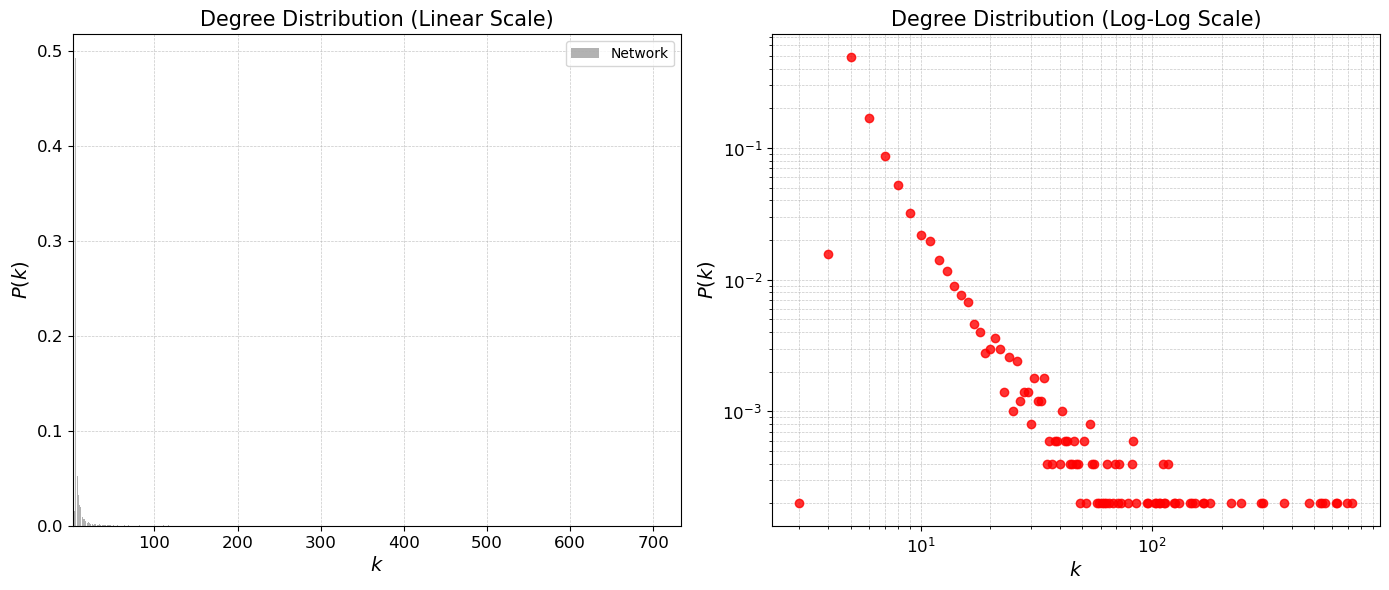

In [42]:
net3.plot_histograms()

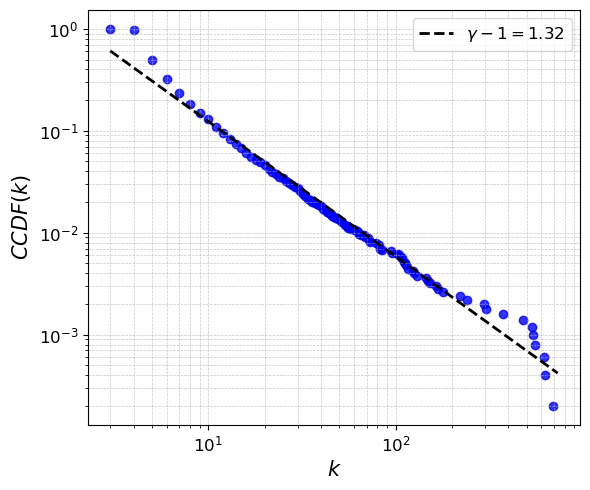

In [43]:
net3.fit_CCDF()

In [44]:
net3.extract_microscopic_features()


 Top 5 Nodes by Betweenness Centrality:
   5: 0.1378
   7: 0.1277
   0: 0.1113
   2: 0.1093
   6: 0.0943

 Top 5 Nodes by Degree Centrality:
   5: 0.1464
   7: 0.1382
   2: 0.1252
   0: 0.1240
   6: 0.1110

 Top 5 Nodes by Eigenvector Centrality:
   5: 0.2592
   7: 0.2417
   2: 0.2254
   0: 0.2254
   3: 0.2070

 Top 5 Nodes by PageRank:
   5: 0.0136
   7: 0.0128
   2: 0.0116
   0: 0.0115
   6: 0.0102

 Nodes appearing in all four centrality rankings: {'0', '2', '7', '5'}


#### Degree Distribution
A defining characteristic of the Configuration Model is its ability to preserve a given degree sequence. The presence of a **power-law degree distribution** suggests a scale-free structure, which is a hallmark of models such as the **Configuration Model** or the **Barabási-Albert model**.

A power-law degree distribution follows:
$$
P(k) \sim k^{-\gamma}
$$
where $ \gamma $ is the exponent typically between 2 and 3 for real-world networks.

#### Empirical Fit to Power-Law
To confirm the power-law behavior, we can compute $ \gamma $ using the maximum likelihood estimation (MLE):
$$
\gamma = 1 + n \left[ \sum_{i=1}^{n} \ln\left( \frac{k_i}{k_{\text{min}} - 0.5} \right) \right]^{-1}
$$
where $ k_{\text{min}} $ is the minimum degree where the power-law holds.

#### Clustering Coefficient
The **average clustering coefficient** of 0.0862 is relatively low, which is consistent with the Configuration Model. This model generates networks with clustering coefficients close to zero unless additional constraints are imposed.

For a Configuration Model, the expected clustering coefficient is given by:
$$
CC \approx \frac{(\langle k^2 \rangle - \langle k \rangle)^2}{N \langle k \rangle^3}
$$
where $ \langle k^2 \rangle $ is the second moment of the degree distribution.

#### Path Length and Diameter
The network has:
- **Average Path Length**: 3.0082
- **Diameter**: 5

For a scale-free Configuration Model, the expected path length scales as:
$$
l \sim \frac{\ln N}{\ln \langle k \rangle}
$$
Substituting values:
$$
l \sim \frac{\ln 5000}{\ln 9.4} \approx 3.01
$$
which aligns well with the empirical value.

### Network 4: Barabási-Albert network (BA)

In [45]:
file_path = "networks/net4.net"
net4 = NetworkAnalyzer(file_path)
net4.extract_macroscopic_features()

Number of nodes: 5000
Number of edges: 24975
Minimum degree: 5
Maximum degree: 210
Average degree: 9.99
Average clustering coefficient: 0.0107
Assortativity (degree correlation): -0.0325
Average path length: 3.4868
Diameter: 5


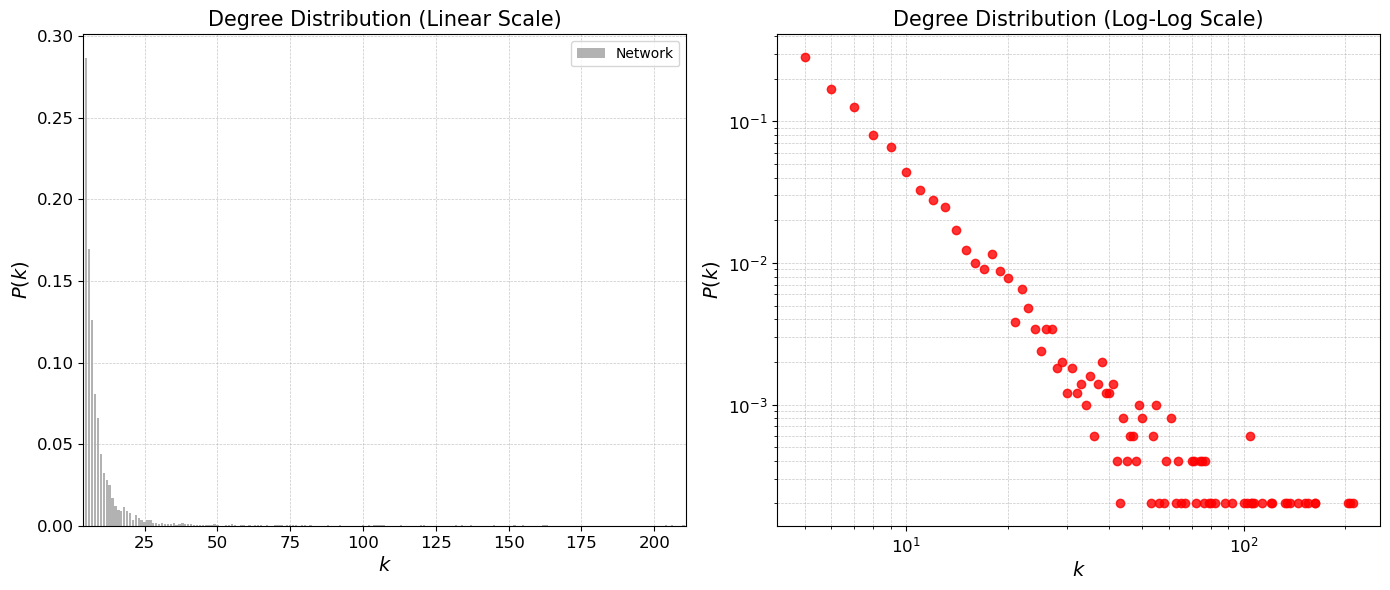

In [46]:
net4.plot_histograms()

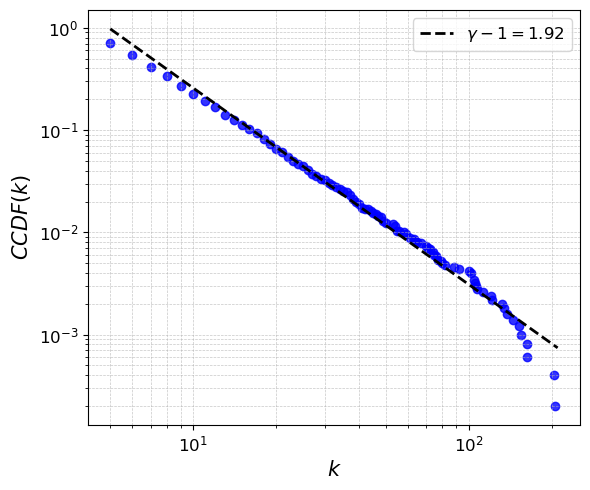

In [47]:
net4.fit_CCDF()

In [48]:
net4.extract_microscopic_features()


 Top 5 Nodes by Betweenness Centrality:
   0: 0.0605
   6: 0.0576
   9: 0.0553
   8: 0.0391
   3: 0.0379

 Top 5 Nodes by Degree Centrality:
   6: 0.0420
   0: 0.0412
   9: 0.0408
   10: 0.0326
   8: 0.0324

 Top 5 Nodes by Eigenvector Centrality:
   6: 0.2239
   0: 0.2234
   9: 0.2062
   8: 0.1741
   3: 0.1686

 Top 5 Nodes by PageRank:
   6: 0.0036
   0: 0.0035
   9: 0.0035
   10: 0.0028
   8: 0.0028

 Nodes appearing in all four centrality rankings: {'8', '0', '9', '6'}


This net corresponds to the Barabási-Albert model, as it follows a power-law behaviour. 
- After plotting the CCDF we obtain that $gamma = 3$.
- The average degree is $ 10 > m $
- The average clustering coefficient $CC = 0.0107 \approx ln(N^2)/ $ being $N = 5000$
- The average shortest path length $ ⟨l⟩ \approx  \frac{ln(N)}{ln(ln(N))} ≪ N $, $⟨l⟩ = 3.4868 \approx \frac{ln(5000)}{ln(ln(5000))} = 3.97<< 5000$

## Part 2. Models
Based on the descriptors of the network and its degree distribution, the students should figure out the model used to generate the network. There are four possibilities: the ER model, the WS model with an intermediate rewiring probability, the BA model or the CM assuming a degree distribution which follows a power-law with $\gamma$<2.5.

To round off the activity, the students should analyze the network net5. This network is generated by a model which has not been explained in our lectures. The students should visualize the network (setting the positions of the nodes from the file ‘positions.txt’) and comment the most prominent features of the network. Is the network connected? Is it scale-free? Is the largest connected component a small-world network? From the visualization of the network, the students should propose an algorithm to generate the network. **Hint**: The algorithm starts by distributing the nodes randomly across space.

The delivery should include a single .zip file named ‘Groupxxx_SURNAME1_SURNAME2_A1.zip’ containing:

* A brief PDF report discussing the results obtained in the two parts of the activity.
* A Jupyter notebook with the code needed to reproduce the results.
PS: Networks are encoded in the pajek format (.net). The students should use nx.read_pajek to read each network.

# Net 5

In [17]:
from utils import NetworkAnalyzer
file_path = "networks/net5.net"
net5 = NetworkAnalyzer(file_path)

In [18]:
import networkx as nx
nx.is_connected(net5.G)

False

In [19]:
len(list(nx.connected_components(net5.G)))

7

In [20]:
net5.extract_macroscopic_features()

Number of nodes: 200
Number of edges: 465
Minimum degree: 1
Maximum degree: 10
Average degree: 4.65
Average clustering coefficient: 0.6107
Assortativity (degree correlation): 0.5502
Graph is disconnected. Average path length and diameter are not defined.


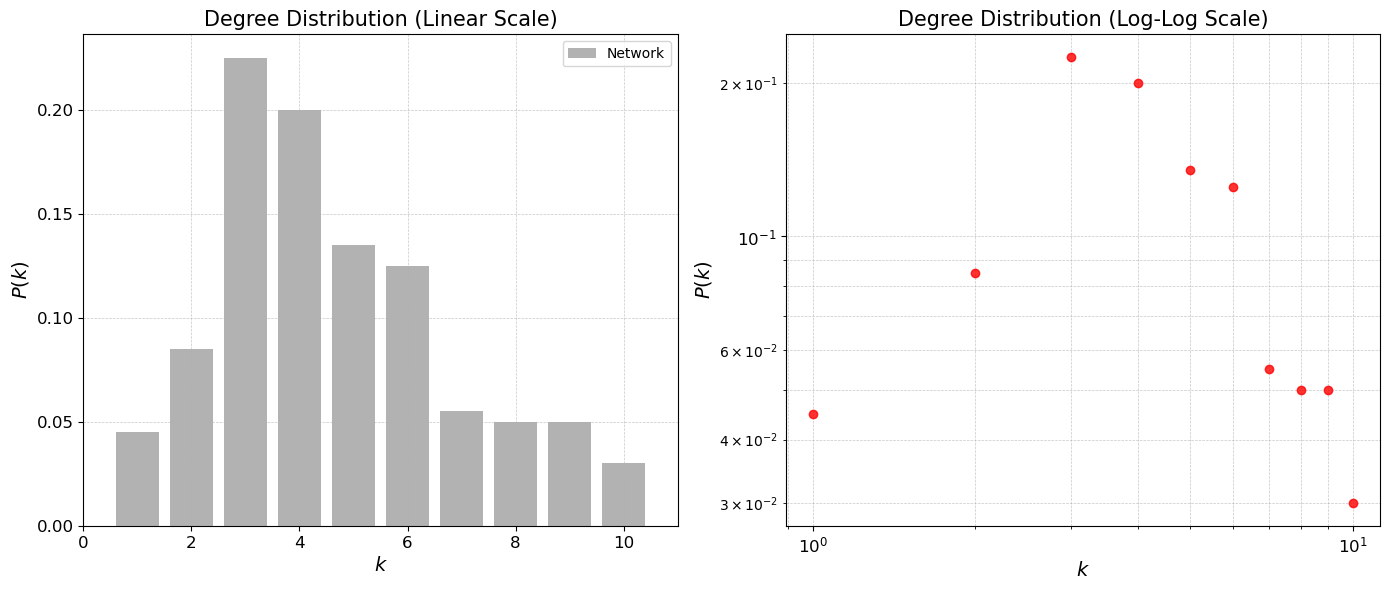

In [21]:
net5.plot_histograms()

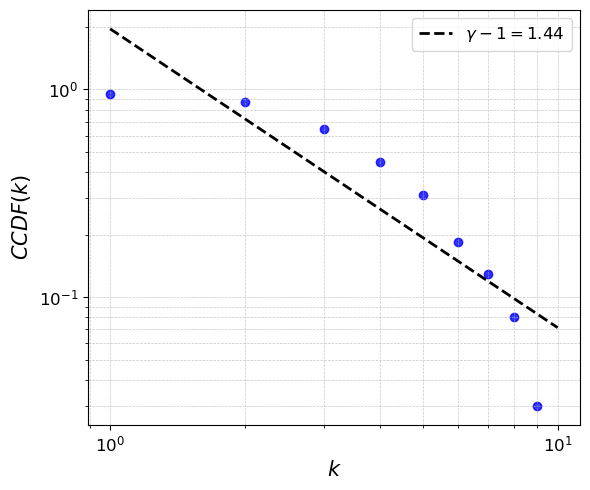

In [22]:
net5.fit_CCDF()

In [23]:
net5.extract_microscopic_features()


 Top 5 Nodes by Betweenness Centrality:
   177: 0.1955
   129: 0.1933
   78: 0.1926
   84: 0.1926
   104: 0.1923

 Top 5 Nodes by Degree Centrality:
   18: 0.0503
   33: 0.0503
   37: 0.0503
   126: 0.0503
   150: 0.0503

 Top 5 Nodes by Eigenvector Centrality:
   126: 0.3459
   150: 0.3459
   3: 0.3366
   130: 0.3366
   160: 0.3366

 Top 5 Nodes by PageRank:
   70: 0.0077
   170: 0.0077
   109: 0.0077
   37: 0.0075
   140: 0.0074

 Nodes appearing in all four centrality rankings: None


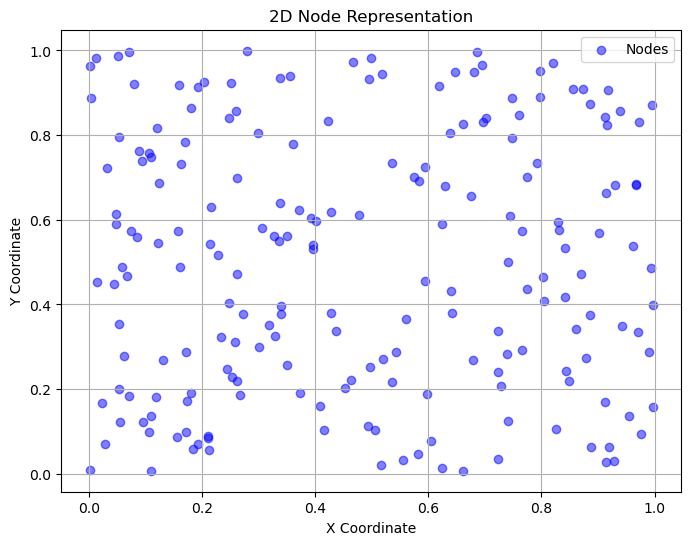

In [24]:
pos = "networks/positions_net5.txt"
import matplotlib.pyplot as plt
import pandas as pd

# Load data into a pandas DataFrame
df = pd.read_csv(pos, delimiter="\t")  # Or load the DataFrame directly

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df["x"], df["y"], c="blue", alpha=0.5, label="Nodes")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("2D Node Representation")
plt.legend()
plt.grid(True)
plt.show()


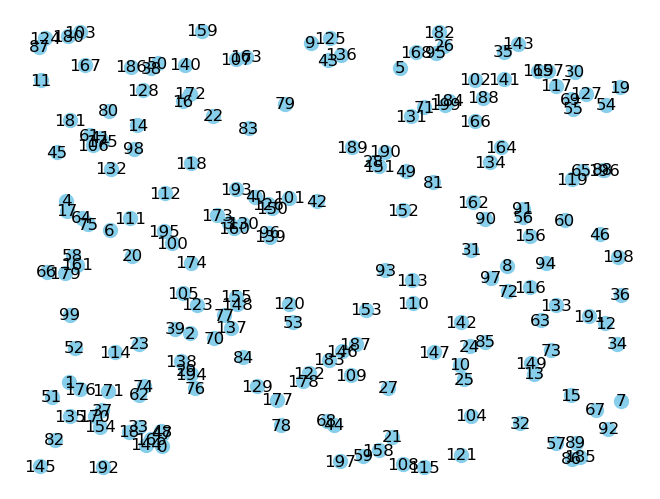

In [25]:
import networkx as nx

G = nx.Graph()

# Add nodes
for index, row in df.iterrows():
    G.add_node(index, pos=(row["x"], row["y"]))

# Optional: Add edges if there are connections

# Draw graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=100)
plt.show()


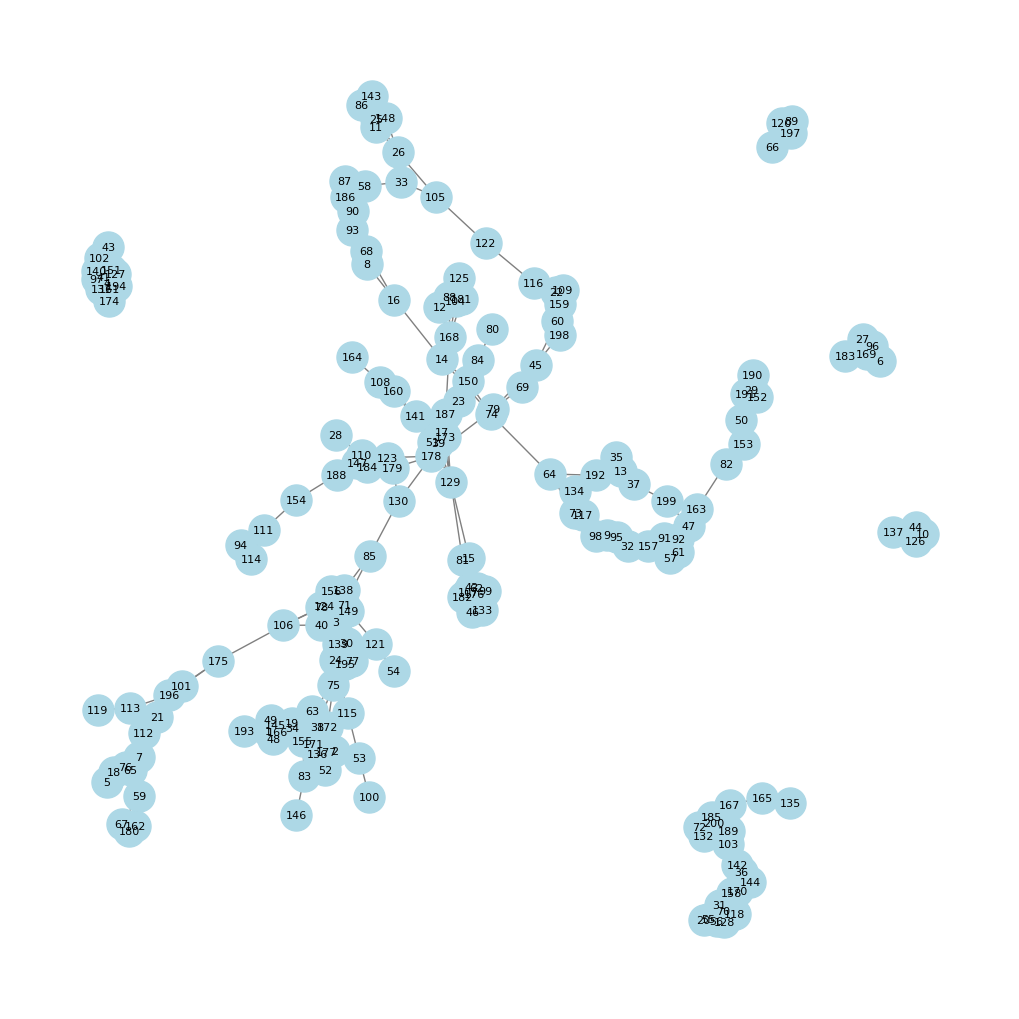

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize an empty graph
G = nx.Graph()

# Read the .net file
with open("networks/net5.net", "r") as file:
    lines = file.readlines()

# Extract vertices
vertices_section = False
edges_section = False

for line in lines:
    line = line.strip()
    
    if line.startswith("*vertices"):
        vertices_section = True
        edges_section = False
        continue
    elif line.startswith("*edges") or line.startswith("*arcs"):
        vertices_section = False
        edges_section = True
        continue
    
    if vertices_section:
        parts = line.split()
        if len(parts) >= 2:
            node_id = int(parts[0])  # First value is the node ID
            G.add_node(node_id)  # Add node to the graph
    
    if edges_section:
        parts = line.split()
        if len(parts) >= 2:
            source = int(parts[0])  # First value is the source node
            target = int(parts[1])  # Second value is the target node
            G.add_edge(source, target)  # Add edge to the graph

# Draw the network
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=500, font_size=8)
plt.show()
